<a href="https://colab.research.google.com/github/NimishMalhotra/ClassifyingAnimalsCNN/blob/master/Cats_Dogs_Human_Horses_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

sample_data


In [ ]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2020-07-26 18:26:51--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2020-07-26 18:26:52--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc33b2a1c7361a7de55441353a07.dl.dropboxusercontent.com/zip_download_get/AfryY9CChFsCMZdB9ofwl3L9Tzdwn-66z2ptgl0yFUzLjwVZA1LAQoLJMg2WE6k7x2oAb5a6FhO7cK_yHyA4XXzSMMy5p3evvXaTiQAiILtCWg [following]
--2020-07-26 18:26:53--  https://uc33b2a1c7361a7de55441353a07.dl.dropboxusercontent.com/zip_download_get/AfryY9CChFsCMZdB9ofwl3L9Tzdwn-66z2ptgl0yFUzLjwVZA1LAQoLJMg2WE6k7x2oAb5a6FhO7cK_yH

In [ ]:
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  


In [ ]:
# To see where the data is
# For every command in terminal put ! in front to execute in jupyter notebook

!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


In [ ]:
import os
os.listdir('Images') # These are the folders

['dogs', 'cats', 'horses', 'humans']

In [ ]:
folders = os.listdir('Images')

In [ ]:
# Iterate over the folders

for f in folders:
  path = 'Images/' + f
  print(f+ " "+str(len(os.listdir(path)))) # Tell all files inside all the folders


dogs 202
cats 202
horses 202
humans 202


In [ ]:
# We have 202 images for each class
# Display an image

In [ ]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

In [ ]:
sample_path = 'Images/cats/cat.1.jpg'
img = image.load_img(sample_path)
print(type(img)) # It is of type image. So to display it using matplotlib we need to convert this image to array

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
x = image.img_to_array(img)/255.0  # To make sure it is in the range 0-1

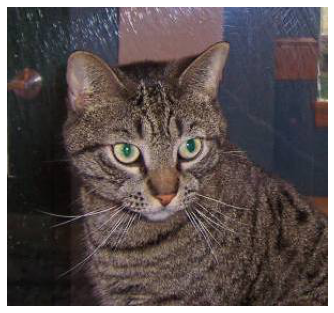

In [ ]:
plt.style.use('seaborn')
plt.imshow(x)
plt.axis('off')
plt.show()

In [ ]:
# Build a Model - This dataset is more complex than MNIST dataset
from keras.layers import *
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
# Compile Model -> Optimizer, Loss, Metrics
from keras import optimizers

In [ ]:
adam = optimizers.adam(learning_rate=1e-4) # 10^-4

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:
# Train Model - 2 Methods

# model.fit(_______) # This method is generally used when the dataset is small and it can fit inside the memory completely. Our dataset is also small.
# Another method is based upon generators.
# Load only single batch of data into the memory, feed it to the model, then we will load the next batch and previous batch is cleaned from the memory.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=1.0/255) # This transformation should be applied to each image, divide each pixel by 255

train_generator = train_gen.flow_from_directory(
    'Images/',
    target_size = (150,150),
    batch_size=32,
    class_mode='categorical' # for labelling 
)

Found 808 images belonging to 4 classes.


In [ ]:
print(train_generator.labels)
print(len(train_generator.labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
train_generator.next() # this gives you data for the next batch

(array([[[[0.6784314 , 0.85098046, 0.9960785 ],
          [0.68235296, 0.854902  , 1.        ],
          [0.6862745 , 0.85098046, 1.        ],
          ...,
          [0.7058824 , 0.854902  , 1.        ],
          [0.7058824 , 0.854902  , 1.        ],
          [0.7058824 , 0.854902  , 1.        ]],
 
         [[0.6784314 , 0.85098046, 0.9960785 ],
          [0.6784314 , 0.85098046, 0.9960785 ],
          [0.6862745 , 0.85098046, 1.        ],
          ...,
          [0.7058824 , 0.854902  , 1.        ],
          [0.7058824 , 0.854902  , 1.        ],
          [0.7058824 , 0.854902  , 1.        ]],
 
         [[0.6745098 , 0.8470589 , 1.        ],
          [0.6784314 , 0.85098046, 0.9960785 ],
          [0.6784314 , 0.85098046, 0.9960785 ],
          ...,
          [0.7019608 , 0.85098046, 0.9960785 ],
          [0.7019608 , 0.85098046, 0.9960785 ],
          [0.7019608 , 0.85098046, 0.9960785 ]],
 
         ...,
 
         [[0.32156864, 0.5803922 , 0.16470589],
          [0.26274

In [ ]:
x,y = train_generator.next()

In [ ]:
print(x.shape)
print(y.shape)

(32, 150, 150, 3)
(32, 4)


In [ ]:
# It is generating a mini batch of size 32. Each image is of size (150,150,3) where 3 is no. of channels -> RGB image
# Each label is now a one-hot vector
# While fitting our model we will loop over mutiple batches

In [ ]:
# Ierate over the entire training dataset

for x,y in train_generator:
  print(x.shape)
  print(y.shape)
  break

(32, 150, 150, 3)
(32, 4)


In [ ]:
# Train our Model
# Validation data can be either a fixed dataset or a generator like we are giving for training part
model.fit_generator

In [ ]:
history = model.fit_generator(
    
    train_generator,
    epochs=40,
    steps_per_epoch=25
)

Epoch 1/40
25/25 [==============================] - 3s 105ms/step - loss: 0.4560 - accuracy: 0.8235
Epoch 2/40
25/25 [==============================] - 3s 103ms/step - loss: 0.4279 - accuracy: 0.8441
Epoch 3/40
25/25 [==============================] - 3s 103ms/step - loss: 0.4132 - accuracy: 0.8351
Epoch 4/40
25/25 [==============================] - 3s 104ms/step - loss: 0.4134 - accuracy: 0.8544
Epoch 5/40
25/25 [==============================] - 3s 102ms/step - loss: 0.3604 - accuracy: 0.8763
Epoch 6/40
25/25 [==============================] - 3s 103ms/step - loss: 0.2939 - accuracy: 0.8969
Epoch 7/40
25/25 [==============================] - 2s 100ms/step - loss: 0.3151 - accuracy: 0.8866
Epoch 8/40
25/25 [==============================] - 3s 101ms/step - loss: 0.2889 - accuracy: 0.9085
Epoch 9/40
25/25 [==============================] - 3s 103ms/step - loss: 0.2893 - accuracy: 0.9008
Epoch 10/40
25/25 [==============================] - 3s 112ms/step - loss: 0.2315 - accuracy: 0.9362

In [ ]:
history.history

{'accuracy': [0.8234536,
  0.84407216,
  0.83505154,
  0.85438144,
  0.87628865,
  0.8969072,
  0.88659793,
  0.90850514,
  0.90077317,
  0.93625,
  0.9148936,
  0.935,
  0.9587766,
  0.95625,
  0.9677835,
  0.9677835,
  0.97473407,
  0.9725,
  0.97164947,
  0.96907216,
  0.98195875,
  0.9871134,
  0.9909794,
  0.9896907,
  0.9935567,
  0.9948454,
  0.99613404,
  0.99613404,
  0.9948454,
  0.9974227,
  1.0,
  0.995,
  1.0,
  1.0,
  0.99871135,
  0.99875,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.4578010492103616,
  0.4284645217595641,
  0.41283602812855513,
  0.40893391727172224,
  0.36831541804923223,
  0.297573900714363,
  0.3120823619291954,
  0.2910110701605217,
  0.28703256151110856,
  0.2315206378698349,
  0.2520157086880917,
  0.2328324580192566,
  0.17841007370263973,
  0.17354941487312317,
  0.15391376768190837,
  0.1495574804925427,
  0.1306367021133291,
  0.1285846610367298,
  0.11441598056825165,
  0.12334659772435415,
  0.09743396092935935,
  0.0805268799214019,
  0.0745556

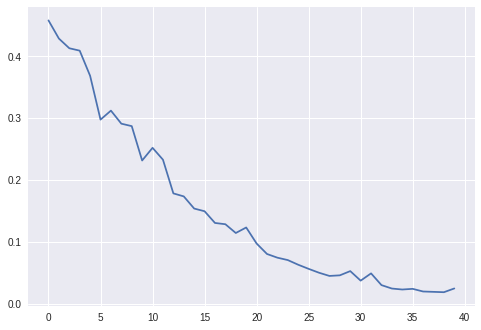

In [ ]:
plt.plot(history.history['loss'])
plt.show()

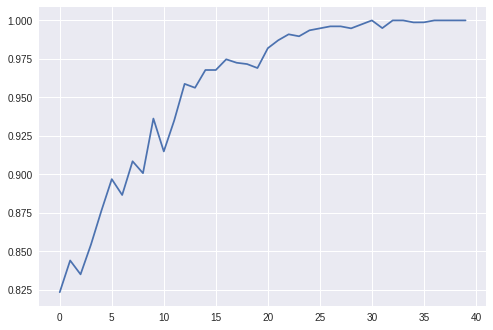

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()